# Part II - Exploratory data Analysis on the Prosper Loan Data
## by Eliel Godsent

## Investigation Overview
My goal here is to explain the loan amount and show patterns towards it

## Dataset Overview

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
data = pd.read_csv('Prosper loan data.csv') # import data
pd.options.display.max_columns = None # displey all rows
data.drop('Unnamed: 0', axis=1, inplace=True)

# create function to convert columns to datetime dtype
toDate = lambda column: pd.to_datetime(data[column], infer_datetime_format=True)

# function call
data['ListingCreationDate'] = toDate('ListingCreationDate')
data['DateCreditPulled'] = toDate('DateCreditPulled')
data['LoanOriginationDate'] = toDate('LoanOriginationDate')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   ListingKey                       113937 non-null  object        
 1   ListingNumber                    113937 non-null  int64         
 2   ListingCreationDate              113937 non-null  datetime64[ns]
 3   Term                             113937 non-null  object        
 4   LoanStatus                       113937 non-null  object        
 5   BorrowerRate                     113937 non-null  float64       
 6   LenderYield                      113937 non-null  float64       
 7   Listing Category                 113937 non-null  object        
 8   IsBorrowerHomeowner              113937 non-null  bool          
 9   CurrentlyInGroup                 113937 non-null  bool          
 10  DateCreditPulled                 113937 non-

## Visualization 1

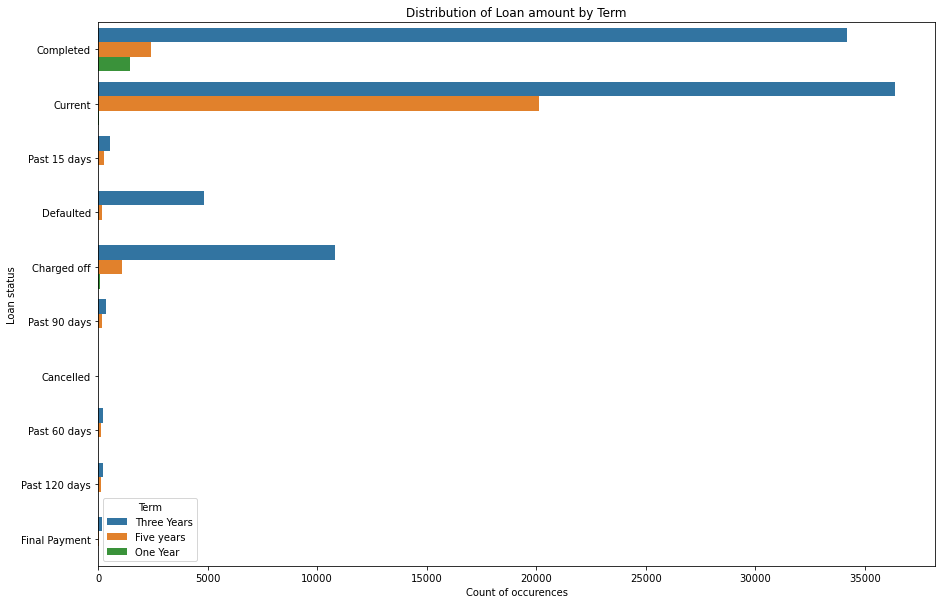

In [6]:
fig, ax = plt.subplots(figsize=(15,10));
sb.countplot(data=data, y='LoanStatus', hue='Term')
plt.title('Distribution of Loan amount by Term');
plt.xlabel('Count of occurences');
plt.ylabel('Loan status');


- Loans of term one year are either completed or charged off
- The most popular loan status are current loans
- Most of the loans are still ongoing

## Visualization 2

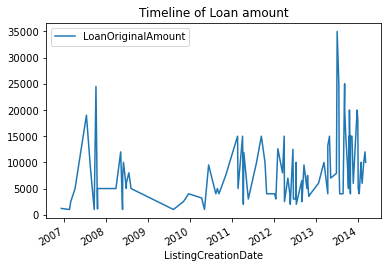

In [7]:
tempData = data.groupby('ListingCreationDate').mean()
tempData.reset_index(inplace=True)
tempData = tempData[['ListingCreationDate', 'LoanOriginalAmount']]
tempData = tempData.sample(100)
tempData.set_index('ListingCreationDate').plot();
plt.title('Timeline of Loan amount');

- Most of loans were taken in 2014

## (Visualization 3)



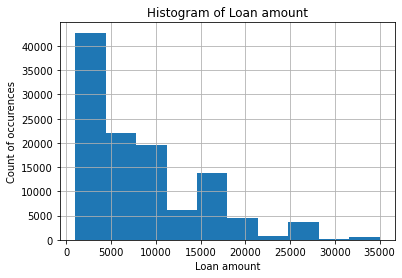

In [8]:
data.LoanOriginalAmount.hist();
plt.title('Histogram of Loan amount');
plt.xlabel('Loan amount');
plt.ylabel('Count of occurences');

- There are more lesser loans than there are higher loans

In [ ]:
!jupyter nbconvert Part_II_Notebook.ipynb --to slides --post serve --no-input --no-prompt